# Basic examples

In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join("..")))
from shaders import *

## Basic Image Shader

To create a shader, we shall extend the `ImageShader` and implement the `mainImage` method. `mainImage` takes a parameter `ctx` which has the value of current render frame.

The coordinates, `fragCoord` are in pixel units, ranging from 0.5 to resolution-0.5, over the rendering surface, where the resolution is passed to the shader through the `iResolution` parameter.

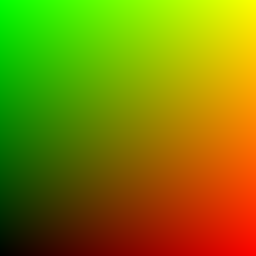

In [2]:
class BasicColor(ImageShader):
    def mainImage(self, ctx):
        uv = ctx.fragCoord / ctx.iResolution;
        ctx.fragColor = vec4(uv.xy, 0, 1)

s = BasicColor()
display(draw(s))